In [1]:
import pandas as pd
from mido import MidiFile
import numpy as np
from music21 import converter, instrument, note, chord
!pip install pypianoroll
import pypianoroll
!pip install pretty_midi
import pretty_midi
import os

<h1>Constants</h1>

In [235]:
NUMBER_OF_MEASURES = 48 # number of measures per sample
BEAT_RESOLUTION = 4 
MEASURE_RESOLUTION = 4 * BEAT_RESOLUTION
BATCH_SIZE = 48
DATAPATH="./beatles-dataset/"
SINGLETRACK = False
track_names = []
lead_track_names = ["melodie","melody","lead","vocal","vocals"]
guitar_track_names = ["guitar","lead guitar","electric guitar","gitar","guitar distorted"]
START_OFFSET = 0
track_names = lead_track_names #if MIDI are multitrack exp.

<h1>Procces MIDI files from datapath into np arrays</h1>

In [236]:
# Load data classical
song_paths = os.listdir(DATAPATH)
data_unprocessed = []
data_prev_unprocessed = []
for path in song_paths:
    try:
        multitrack = pypianoroll.read(DATAPATH + path)
    except:
        print("Could't read track " + path)
        continue
    try:
        multitrack.set_resolution(BEAT_RESOLUTION)
        multitrack.binarize()
        if SINGLETRACK:
            multitrack.tracks = [multitrack.tracks[0]]
        else:
            track_appended = False
            selected_track = []
            for track in multitrack.tracks:
                if len(list(filter(lambda x: x.lower() in track.name, track_names))) > 0 and not track_appended:
                        selected_track.append(track)
                        track_appended = True
                if len(selected_track) == 0:
                    continue
                multitrack.tracks = selected_track
        pianoroll = multitrack.stack()
        m = pianoroll[:,START_OFFSET:NUMBER_OF_MEASURES * MEASURE_RESOLUTION + START_OFFSET]
        bars = np.hsplit(m,NUMBER_OF_MEASURES)
        # shift bars for 1
        bars_prev = bars[-1:] + bars[:-1]
        bars_prev[0] = np.zeros(bars_prev[0].shape)
        for x in bars:
            data_unprocessed.append(x)
        for x_prev in bars_prev:
             data_prev_unprocessed.append(x_prev)
        print("File {0} processed".format(path))
    except Exception as e:
        print(e)
        print("Error processing file at path " + path)
        continue
print("Done")
print(len(data_unprocessed))
print(len(data_prev_unprocessed))

File Taxman.2.mid processed
File Slow Down.2.mid processed
File Birthday.2.mid processed
File Getting Better.mid processed
File I'm A Loser.mid processed
File What Goes On.mid processed
File Paperback Writer.2.mid processed
File Tell Me What You See.1.mid processed
File Here Comes the Sun   The Inner Light (transition).mid processed
File Medley: Rip It Up   Shake, Rattle and Roll   Blue Suede Shoes.1.mid processed
File Sgt. Pepper Inner Groove.mid processed
File Paperback Writer.3.mid processed
File Rock And Roll Music.2.mid processed
File Let It Be.9.mid processed
File A Hard Day's Night.3.mid processed
File Sgt. Pepper Inner Groove.3.mid processed
File There's a Place.mid processed
File Dream Baby.mid processed
File Hey Jude.4.mid processed
File Ob-La-Di, Ob-La-Da.mid processed
File Help!.3.mid processed
array split does not result in an equal division
Error processing file at path Sun King.mid
File Get Back.6.mid processed
File I'll Cry Instead.mid processed
array split does not res

File Tomorrow Never Knows.2.mid processed
File I Want You (She's So Heavy).2.mid processed
File Something.6.mid processed
File All My Loving.1.mid processed
File Help!.5.mid processed
File I Should Have Known Better.4.mid processed
File Revolution.mid processed
File Don't Ever Change.mid processed
File I'm Down.2.mid processed
array split does not result in an equal division
Error processing file at path In My Life.5.mid
File I Need You.mid processed
File We Can Work It Out.1.mid processed
File Free as a Bird.mid processed
array split does not result in an equal division
Error processing file at path You've Got to Hide Your Love Away.1.mid
File Twist And Shout.7.mid processed
File You Never Give Me Your Money.1.mid processed
array split does not result in an equal division
Error processing file at path Hello Goodbye.2.mid
File We Can Work It Out.2.mid processed
File And I Love Her.3.mid processed
File Come Together.4.mid processed
File I Saw Her Standing There.1.mid processed
File Helt

File Whole Lotta Shakin' Goin' On.mid processed
File Here, There And Everywhere.4.mid processed
File I Want to Hold Your Hand.1.mid processed
File It's All Too Much.1.mid processed
File The Continuing Story of Bungalow Bill.1.mid processed
File Too Much Monkey Business.mid processed
File While My Guitar Gently Weeps.2.mid processed
File Can't Buy Me Love.3.mid processed
File Ticket to Ride.3.mid processed
File I Want to Hold Your Hand.4.mid processed
File All You Need Is Love.1.mid processed
File Blue Moon.mid processed
File And I Love Her.5.mid processed
array split does not result in an equal division
Error processing file at path Here, There And Everywhere.2.mid
File You Really Got a Hold on Me.mid processed
File Day Tripper.7.mid processed
File I'm A Loser.1.mid processed
File I Saw Her Standing There.mid processed
File Twist And Shout.2.mid processed
File The Long and Winding Road.2.mid processed
File Don't Let Me Down.4.mid processed
File Ask Me Why.mid processed
File Free as a B

File Oh! Darling.2.mid processed
File I Want to Hold Your Hand.7.mid processed
File Golden Slumbers.1.mid processed
File Misery.2.mid processed
File Your Mother Should Know.2.mid processed
File Mother Nature's Son.2.mid processed
File The Night Before.mid processed
File You Won't See Me.mid processed
File Got To Get You Into My Life.1.mid processed
File Twist And Shout.5.mid processed
Could't read track Paperback Writer.4.mid
File I Wanna Be Your Man.1.mid processed
File Lovely Rita.1.mid processed
File Eleanor Rigby.13.mid processed
File And I Love Her.1.mid processed
Could't read track Fixing a Hole.mid
File Paperback Writer.5.mid processed
File Boys.mid processed
File Lend Me Your Comb.mid processed
File You Can't Do That.mid processed
File I Am the Walrus.1.mid processed
File Hello Goodbye.3.mid processed
array split does not result in an equal division
Error processing file at path You Know What to Do.mid
File Day Tripper.4.mid processed
File She's Leaving Home.1.mid processed
arr

File Rain.mid processed
File Love Song.mid processed
File Can't Buy Me Love.1.mid processed
File I Got a Woman.mid processed
File Sweet Georgia Brown.mid processed
File Sgt. Pepper's Lonely Hearts Club Band.mid processed
array split does not result in an equal division
Error processing file at path Yes It Is.2.mid
File Here, There And Everywhere.mid processed
File Sgt. Pepper's Lonely Hearts Club Band.2.mid processed
File Nowhere Man.4.mid processed
File I'll Cry Instead.1.mid processed
File Lady Madonna.8.mid processed
File Please Mister Postman.1.mid processed
File I'll Follow The Sun.1.mid processed
File Kansas City (Lieber-Stoller).2.mid processed
File Savoy Truffle.mid processed
File Do You Want to Know a Secret.1.mid processed
File Every Little Thing.2.mid processed
Done
33744
33744


<h1>Process collected data and plot sample</h1>

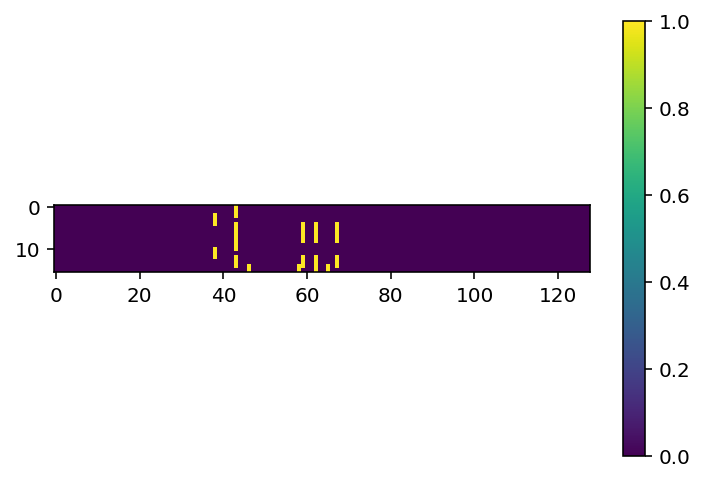

In [244]:
import matplotlib.pyplot as plt
data = data_unprocessed
data = [bar for bar in data if bar.shape == (1,16,128)]
data = np.stack(data)

plt.imshow(data[0].reshape(16,128))
plt.colorbar()
plt.show()

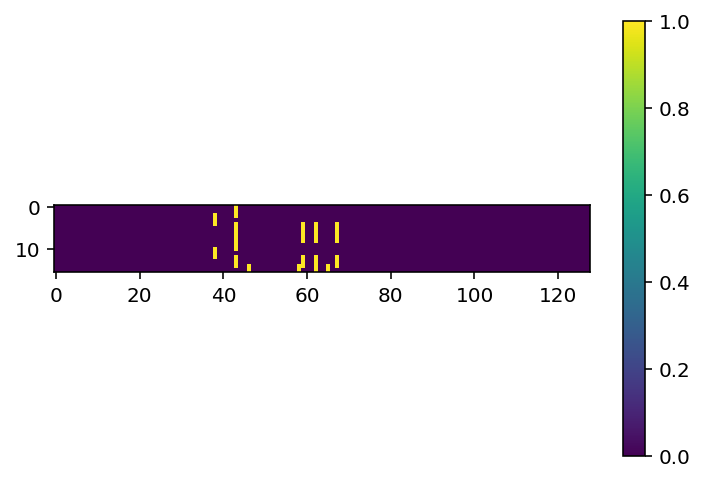

In [245]:
data_prev = data_prev_unprocessed
data_prev = [bar for bar in data_prev if bar.shape == (1,16,128)]

plt.imshow(data_prev[1].reshape(16,128))
plt.colorbar()
plt.show()

<h1>Save processed data to disk for later reuse</h1>

In [242]:
from numpy import asarray
from numpy import save

p = asarray(data_prev)
save('beatles_24bars_x_prev.npy', p)
p = asarray(data)
save('beatles_24bars_x.npy', p)

<h1>Load processed data from disk</h1>

In [243]:
from numpy import load
import numpy as np
x_str = "./processed_x.npy"
x_str_prev = "./processed_x_prev.npy"
data_prev = load(x_str)
data = load(x_str_prev)
print("Length of x: {0}".format(len(data)))
print("Length of x prev: {0}".format(len(data_prev)))

FileNotFoundError: [Errno 2] No such file or directory: './processed_x.npy'

<h1>Define PyThorch models</h1>

In [246]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader

has_gpu = torch.cuda.is_available()
print(has_gpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


<h1>Define PyThorch dataset for loading data</h1>

In [247]:
class BarDataset(Dataset):
    def __init__(self, data, data_prev, device):
        self.device = device
        self.data, self.data_prev, self.data_len = self.extract_data(data, data_prev)
    
    def __len__(self):
        return self.data_len
    
    @property
    def shape(self):
        return self.data.shape;
    
    def __getitem__(self, idx):
        X = self.data[idx]
        X_prev = self.data_prev[idx]
        return X, X_prev
    
    def extract_data(self, data, data_prev):
        data_len = data.shape[0]
        data = torch.Tensor(data).to(device)
        data_prev = torch.Tensor(data_prev).to(device)
        return data, data_prev, data_len

<h1>Define PyThorch dataloader</h1>

In [248]:
dataset = BarDataset(data,data_prev,device)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

<h1>Define custom reusable Convolution and Transpoded Convolution layers</h1>

In [202]:
class ConvolutionLayer2d(nn.Module):
    def __init__(self, channels_in, channels_out, kernel, stride, padding):
        super(ConvolutionLayer2d, self).__init__()
        self.conv = nn.Conv2d(channels_in, channels_out, kernel, stride, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(channels_out)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2, inplace = False)
    
    def forward(self,x):
        x = self.conv(x)
        x = self.batch_norm(x)
        x = self.leaky_relu(x)
        return x

In [203]:
class ConvolutionTransposeLayer2d(nn.Module):
    def __init__(self, channels_in, channels_out, kernel, stride, padding):
        super(ConvolutionTransposeLayer2d, self).__init__()
        self.conv = nn.ConvTranspose2d(channels_in, channels_out, kernel, stride, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(channels_out)
        self.relu = nn.ReLU(inplace = False)
    
    def forward(self, x, normalize=True, activation=None):
        x = self.conv(x)
        if normalize:
            x = self.batch_norm(x)
        if activation != None:
            x = activation(x)
        return x

<h1>Helper funciton to concat previous features on Transpoded Convolution output, on feature map axis</h1>

In [204]:
def conv_prev_concat(x, y):
        x_shapes = x.shape
        y_shapes = y.shape
        if x_shapes[2:] == y_shapes[2:]:
            y2 = y.expand(x_shapes[0],y_shapes[1],x_shapes[2],x_shapes[3])
            return torch.cat((x, y2),1)
        else:
            print("Error")
            print(x_shapes)
            print(y_shapes)

<h1>Custom Linear layer</h1>

In [205]:
class LinearLayer(nn.Module):
    def __init__(self, linear_in, linear_out):
        super(LinearLayer, self).__init__()
        self.linear = nn.Linear(linear_in, linear_out)
        self.batch_norm = nn.BatchNorm1d(linear_out)
        self.relu =  nn.ReLU()
    
    def forward(self, x):
        x = self.linear(x)
        x = self.batch_norm(x)
        x = self.relu(x)
        return x

<h1>Define Generator</h1>

In [206]:
class Generator(nn.Module):
    def __init__(self, nz=100, pitches=128):
        super(Generator,self).__init__()
        self.nz = nz
        self.pitches = pitches
        self.filters_number = 256
        self.filters_number_conditioner = 256
        self.transpose_filters_number = 512
        
        self.linear0 = LinearLayer(nz, 1024)
        self.linear1 = LinearLayer(1024,512)
        
        # Generator transposed convolutions layers
        self.hidden0 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=self.filters_number, kernel=(2,1), stride=2, padding=0)
        self.hidden1 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=self.filters_number, kernel=(2,1), stride=2, padding=0)
        self.hidden2 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=self.filters_number, kernel=(2,1), stride=2, padding=0)
        self.hidden3 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=1, kernel=(1,pitches), stride=(1,2), padding=0)
        
        # Conditioner convolution layers
        self.condition_hidden0 = ConvolutionLayer2d(channels_in=1, channels_out=self.filters_number_conditioner, kernel=(1,128), stride=(1,2), padding=0)
        self.condition_hidden1 = ConvolutionLayer2d(channels_in=self.filters_number_conditioner, channels_out=self.filters_number_conditioner, kernel=(2,1), stride=2, padding=0)
        self.condition_hidden2 = ConvolutionLayer2d(channels_in=self.filters_number_conditioner, channels_out=self.filters_number_conditioner, kernel=(2,1), stride=2, padding=0)
        self.condition_hidden3 = ConvolutionLayer2d(channels_in=self.filters_number_conditioner, channels_out=self.filters_number_conditioner, kernel=(2,1), stride=2, padding=0)
        
        self.sigmoid = nn.Sigmoid()
            
    def forward(self, z, prev_x):
        batch_size = prev_x.shape[0]
        
        condition_hidden0 = self.condition_hidden0(prev_x) 
        condition_hidden1 = self.condition_hidden1(condition_hidden0)   
        condition_hidden2 = self.condition_hidden2(condition_hidden1)
        condition_hidden3 = self.condition_hidden2(condition_hidden2)
        
        z = z.view(batch_size,-1)
        
        h0 = self.linear0(z)
        h1 = self.linear1(h0)
        
        h1 = h1.view(batch_size, 256, 2, 1)
        h1 = conv_prev_concat(h1, condition_hidden3)

        h2 = self.hidden0(h1)
        h2 = conv_prev_concat(h2, condition_hidden2)
        
        h3 = self.hidden1(h2)
        h3 = conv_prev_concat(h3, condition_hidden1)
        
        h4 = self.hidden2(h3)
        h4 = conv_prev_concat(h4, condition_hidden0)
        
        x = self.hidden3(h4, normalize=False, activation=nn.Sigmoid())
                
        return x
        
        
        


<h1>Define Discriminator</h1>

In [207]:
class Discriminator(nn.Module):
    def __init__(self, pitches=128):
        super(Discriminator,self).__init__()
        self.pitches = pitches
        self.linear_in = 231 #77
        
        self.hidden0 = ConvolutionLayer2d(channels_in=1, channels_out=27, kernel=(2,128), stride=2, padding=0)
        #self.hidden2 = ConvolutionLayer2d(channels_in=256, channels_out=256, kernel=(3,1), stride=2, padding=0)
        self.hidden1 = ConvolutionLayer2d(channels_in=27, channels_out=77, kernel=(4,1), stride=2, padding=0)
        self.linear = nn.Linear(self.linear_in, 1024)
        self.linear2 = nn.Linear(1024,1)
        self.sigmoid = nn.Sigmoid()
        self.lrelu = nn.LeakyReLU()
        
    def forward(self, x):
        batch_size = x.shape[0]
        h0 = self.hidden0(x)
        fm = h0
        #h1 = self.hidden2(h0)
        h1 = self.hidden1(h0)
        h1 = h1.view(batch_size,-1)
        l = self.linear(h1)
        l = self.lrelu(l)
        out = self.linear2(l)
        out_sigmoid = self.sigmoid(out)
        return out_sigmoid, out, fm                                  

<h1>Helper methods</h1>

In [208]:
def reduce_mean(x):
    output = torch.mean(x,0, keepdim = False)
    output = torch.mean(output,-1, keepdim = False)
    return output

def l2_loss(x,y):
    return nn.MSELoss(reduction='sum')(x, y) / 2


<h1>Train GAN</h1>

In [253]:
lr = 0.0002
epochs=500
nz=100
betas = (0.5, 0.999)

torch.cuda.empty_cache()

netG = Generator(nz=nz)
netD = Discriminator()

optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=betas)
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=betas)

criterion = nn.BCEWithLogitsLoss()

n_g_train = 2

netG.train()
netD.train()

netG.to(device)
netD.to(device)
    
G_losses = []
D_losses = []

lamda1 = 0.01
lamda2 = 0.1


for epoch in range(epochs):
    for i, (X, X_prev) in enumerate(data_loader, 0):        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        batch_size = X.size(0)
        output_real, logits_real, fm = netD(X)
        real_label = torch.ones_like(logits_real) * 0.9 
        errD_real = reduce_mean(criterion(logits_real,real_label))
        D_x = output_real.mean().item()
        
        ## Train with all-fake batch
        noise = torch.rand(batch_size, nz, device=device)
        fake = netG(noise,X_prev)
        output_fake, logits_fake, fm_ = netD(fake.detach())
        fake_label = torch.zeros_like(logits_fake)
        errD_fake = reduce_mean(criterion(logits_fake,fake_label))
        D_G_z1 = output_fake.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        errD.backward(retain_graph=True)
        # Update D
        optimizerD.step()
       
        ############################
        # (2) Update G network: 
        # maximize log(D(G(z))) + lamda1 * l2_loss(fake_image,real_image) + lamda2 * l2_loss(fm_fake,fm_real)
        # Update G n_g_train times to make Discriminator weaker
        ###########################
        for _ in range(0,n_g_train):
            _,_,fm_r = netD(X)
            optimizerG.zero_grad()
            fake = netG(noise,X_prev)
            output, logits, fm_ = netD(fake)
            D_G_z2 = output.mean().item()
            real_label = torch.ones_like(logits)
            g_loss_fake = reduce_mean(criterion(logits, real_label))
            # Feature matching 
            mean_fake_image = torch.mean(fake,0)
            mean_real_image = torch.mean(X, 0)
            g_loss_image = l2_loss(mean_fake_image, mean_real_image)
            g_loss_image = torch.mul(g_loss_image, lamda1)
            # Feature matching based on first convolution output
            mean_fm_real = torch.mean(fm_r,0)
            mean_fm_fake = torch.mean(fm_,0)
            g_loss_fm = l2_loss(mean_fm_fake, mean_fm_real)
            g_loss_fm = torch.mul(g_loss_fm, lamda2)
            # Compute error of G as sum of criterion loss and feature matching loss
            errG = g_loss_fake + g_loss_image + g_loss_fm
            errG.backward(retain_graph=True)
            # Update G
            optimizerG.step()
        
        
        if i % 15 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, epochs, i, len(data_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        

[0/500][0/36]	Loss_D: 1.4288	Loss_G: 3.0661	D(x): 0.5433	D(G(z)): 0.5486 / 0.5312
[0/500][15/36]	Loss_D: 1.3957	Loss_G: 2.6737	D(x): 0.4323	D(G(z)): 0.4396 / 0.4520
[0/500][30/36]	Loss_D: 1.3837	Loss_G: 2.2508	D(x): 0.4416	D(G(z)): 0.4421 / 0.4499
[1/500][0/36]	Loss_D: 1.3752	Loss_G: 1.7371	D(x): 0.4440	D(G(z)): 0.4416 / 0.4502
[1/500][15/36]	Loss_D: 1.3792	Loss_G: 1.5549	D(x): 0.4345	D(G(z)): 0.4336 / 0.4414
[1/500][30/36]	Loss_D: 1.3644	Loss_G: 1.4518	D(x): 0.4499	D(G(z)): 0.4413 / 0.4524
[2/500][0/36]	Loss_D: 1.3691	Loss_G: 1.1839	D(x): 0.4458	D(G(z)): 0.4404 / 0.4518
[2/500][15/36]	Loss_D: 1.3584	Loss_G: 1.1311	D(x): 0.4465	D(G(z)): 0.4343 / 0.4458
[2/500][30/36]	Loss_D: 1.3654	Loss_G: 1.1359	D(x): 0.4523	D(G(z)): 0.4445 / 0.4539
[3/500][0/36]	Loss_D: 1.3748	Loss_G: 0.9952	D(x): 0.4456	D(G(z)): 0.4432 / 0.4558
[3/500][15/36]	Loss_D: 1.3473	Loss_G: 0.9893	D(x): 0.4456	D(G(z)): 0.4267 / 0.4441
[3/500][30/36]	Loss_D: 1.3563	Loss_G: 0.9948	D(x): 0.4519	D(G(z)): 0.4390 / 0.4560
[4/500][

[33/500][15/36]	Loss_D: 1.3612	Loss_G: 0.7932	D(x): 0.4629	D(G(z)): 0.4531 / 0.4583
[33/500][30/36]	Loss_D: 1.3502	Loss_G: 0.8287	D(x): 0.4453	D(G(z)): 0.4245 / 0.4434
[34/500][0/36]	Loss_D: 1.3258	Loss_G: 0.8538	D(x): 0.4794	D(G(z)): 0.4459 / 0.4566
[34/500][15/36]	Loss_D: 1.3806	Loss_G: 0.7766	D(x): 0.4558	D(G(z)): 0.4550 / 0.4659
[34/500][30/36]	Loss_D: 1.3408	Loss_G: 0.8157	D(x): 0.4590	D(G(z)): 0.4358 / 0.4496
[35/500][0/36]	Loss_D: 1.3351	Loss_G: 0.8795	D(x): 0.4797	D(G(z)): 0.4493 / 0.4525
[35/500][15/36]	Loss_D: 1.3678	Loss_G: 0.8028	D(x): 0.4786	D(G(z)): 0.4700 / 0.4542
[35/500][30/36]	Loss_D: 1.3505	Loss_G: 0.7946	D(x): 0.4401	D(G(z)): 0.4172 / 0.4587
[36/500][0/36]	Loss_D: 1.3317	Loss_G: 0.8535	D(x): 0.4633	D(G(z)): 0.4318 / 0.4584
[36/500][15/36]	Loss_D: 1.3805	Loss_G: 0.7635	D(x): 0.4424	D(G(z)): 0.4430 / 0.4713
[36/500][30/36]	Loss_D: 1.3975	Loss_G: 0.7805	D(x): 0.4428	D(G(z)): 0.4506 / 0.4655
[37/500][0/36]	Loss_D: 1.3168	Loss_G: 0.8538	D(x): 0.4959	D(G(z)): 0.4566 / 0.4

[66/500][15/36]	Loss_D: 1.3778	Loss_G: 0.7872	D(x): 0.4633	D(G(z)): 0.4617 / 0.4577
[66/500][30/36]	Loss_D: 1.3977	Loss_G: 0.8366	D(x): 0.3935	D(G(z)): 0.3907 / 0.4374
[67/500][0/36]	Loss_D: 1.3142	Loss_G: 0.8314	D(x): 0.5016	D(G(z)): 0.4608 / 0.4603
[67/500][15/36]	Loss_D: 1.3709	Loss_G: 0.7823	D(x): 0.4544	D(G(z)): 0.4502 / 0.4595
[67/500][30/36]	Loss_D: 1.3849	Loss_G: 0.8220	D(x): 0.4378	D(G(z)): 0.4357 / 0.4429
[68/500][0/36]	Loss_D: 1.3274	Loss_G: 0.8382	D(x): 0.5222	D(G(z)): 0.4844 / 0.4571
[68/500][15/36]	Loss_D: 1.3766	Loss_G: 0.7732	D(x): 0.4689	D(G(z)): 0.4670 / 0.4637
[68/500][30/36]	Loss_D: 1.4041	Loss_G: 0.8392	D(x): 0.4050	D(G(z)): 0.4075 / 0.4366
[69/500][0/36]	Loss_D: 1.3257	Loss_G: 0.8217	D(x): 0.4960	D(G(z)): 0.4621 / 0.4652
[69/500][15/36]	Loss_D: 1.3787	Loss_G: 0.7800	D(x): 0.4484	D(G(z)): 0.4484 / 0.4610
[69/500][30/36]	Loss_D: 1.3814	Loss_G: 0.8013	D(x): 0.4235	D(G(z)): 0.4204 / 0.4517
[70/500][0/36]	Loss_D: 1.3243	Loss_G: 0.8370	D(x): 0.5174	D(G(z)): 0.4785 / 0.4

[99/500][15/36]	Loss_D: 1.3824	Loss_G: 0.7424	D(x): 0.4491	D(G(z)): 0.4503 / 0.4780
[99/500][30/36]	Loss_D: 1.3870	Loss_G: 0.8181	D(x): 0.4211	D(G(z)): 0.4198 / 0.4438
[100/500][0/36]	Loss_D: 1.3350	Loss_G: 0.7749	D(x): 0.4784	D(G(z)): 0.4513 / 0.4743
[100/500][15/36]	Loss_D: 1.3949	Loss_G: 0.7500	D(x): 0.4169	D(G(z)): 0.4222 / 0.4747
[100/500][30/36]	Loss_D: 1.3864	Loss_G: 0.8065	D(x): 0.4432	D(G(z)): 0.4441 / 0.4489
[101/500][0/36]	Loss_D: 1.3569	Loss_G: 0.7910	D(x): 0.5109	D(G(z)): 0.4909 / 0.4665
[101/500][15/36]	Loss_D: 1.3815	Loss_G: 0.7608	D(x): 0.4616	D(G(z)): 0.4626 / 0.4692
[101/500][30/36]	Loss_D: 1.3963	Loss_G: 0.8031	D(x): 0.4102	D(G(z)): 0.4126 / 0.4504
[102/500][0/36]	Loss_D: 1.3475	Loss_G: 0.7908	D(x): 0.4666	D(G(z)): 0.4469 / 0.4684
[102/500][15/36]	Loss_D: 1.3877	Loss_G: 0.7566	D(x): 0.4154	D(G(z)): 0.4166 / 0.4720
[102/500][30/36]	Loss_D: 1.3823	Loss_G: 0.8196	D(x): 0.4278	D(G(z)): 0.4267 / 0.4432
[103/500][0/36]	Loss_D: 1.3516	Loss_G: 0.7905	D(x): 0.5057	D(G(z)): 0.

[131/500][30/36]	Loss_D: 1.3849	Loss_G: 0.8189	D(x): 0.4376	D(G(z)): 0.4398 / 0.4430
[132/500][0/36]	Loss_D: 1.3614	Loss_G: 0.8018	D(x): 0.4780	D(G(z)): 0.4644 / 0.4548
[132/500][15/36]	Loss_D: 1.3812	Loss_G: 0.7813	D(x): 0.4402	D(G(z)): 0.4386 / 0.4606
[132/500][30/36]	Loss_D: 1.3781	Loss_G: 0.7769	D(x): 0.4430	D(G(z)): 0.4406 / 0.4628
[133/500][0/36]	Loss_D: 1.3624	Loss_G: 0.7725	D(x): 0.4694	D(G(z)): 0.4578 / 0.4681
[133/500][15/36]	Loss_D: 1.3810	Loss_G: 0.7862	D(x): 0.4314	D(G(z)): 0.4297 / 0.4586
[133/500][30/36]	Loss_D: 1.3893	Loss_G: 0.8020	D(x): 0.4327	D(G(z)): 0.4370 / 0.4508
[134/500][0/36]	Loss_D: 1.3682	Loss_G: 0.7944	D(x): 0.4789	D(G(z)): 0.4690 / 0.4580
[134/500][15/36]	Loss_D: 1.3725	Loss_G: 0.7839	D(x): 0.4468	D(G(z)): 0.4415 / 0.4592
[134/500][30/36]	Loss_D: 1.3904	Loss_G: 0.7789	D(x): 0.4471	D(G(z)): 0.4506 / 0.4618
[135/500][0/36]	Loss_D: 1.3672	Loss_G: 0.7730	D(x): 0.4635	D(G(z)): 0.4545 / 0.4680
[135/500][15/36]	Loss_D: 1.3788	Loss_G: 0.7967	D(x): 0.4455	D(G(z)): 

[164/500][15/36]	Loss_D: 1.3765	Loss_G: 0.8233	D(x): 0.4434	D(G(z)): 0.4407 / 0.4408
[164/500][30/36]	Loss_D: 1.3842	Loss_G: 0.8253	D(x): 0.4420	D(G(z)): 0.4415 / 0.4402
[165/500][0/36]	Loss_D: 1.3694	Loss_G: 0.7576	D(x): 0.4615	D(G(z)): 0.4539 / 0.4736
[165/500][15/36]	Loss_D: 1.3701	Loss_G: 0.8009	D(x): 0.4261	D(G(z)): 0.4183 / 0.4514
[165/500][30/36]	Loss_D: 1.3772	Loss_G: 0.8099	D(x): 0.4641	D(G(z)): 0.4583 / 0.4475
[166/500][0/36]	Loss_D: 1.3721	Loss_G: 0.7683	D(x): 0.4696	D(G(z)): 0.4619 / 0.4687
[166/500][15/36]	Loss_D: 1.3757	Loss_G: 0.8200	D(x): 0.4488	D(G(z)): 0.4458 / 0.4425
[166/500][30/36]	Loss_D: 1.3834	Loss_G: 0.8212	D(x): 0.4637	D(G(z)): 0.4600 / 0.4421
[167/500][0/36]	Loss_D: 1.3724	Loss_G: 0.7705	D(x): 0.4365	D(G(z)): 0.4289 / 0.4674
[167/500][15/36]	Loss_D: 1.3803	Loss_G: 0.8162	D(x): 0.4180	D(G(z)): 0.4155 / 0.4441
[167/500][30/36]	Loss_D: 1.3816	Loss_G: 0.7831	D(x): 0.4368	D(G(z)): 0.4358 / 0.4595
[168/500][0/36]	Loss_D: 1.3709	Loss_G: 0.7688	D(x): 0.4746	D(G(z)): 

[196/500][30/36]	Loss_D: 1.3863	Loss_G: 0.7740	D(x): 0.4091	D(G(z)): 0.4083 / 0.4633
[197/500][0/36]	Loss_D: 1.3702	Loss_G: 0.7970	D(x): 0.4523	D(G(z)): 0.4445 / 0.4552
[197/500][15/36]	Loss_D: 1.3733	Loss_G: 0.7870	D(x): 0.4210	D(G(z)): 0.4154 / 0.4570
[197/500][30/36]	Loss_D: 1.3824	Loss_G: 0.8114	D(x): 0.4582	D(G(z)): 0.4563 / 0.4461
[198/500][0/36]	Loss_D: 1.3718	Loss_G: 0.8089	D(x): 0.4683	D(G(z)): 0.4610 / 0.4495
[198/500][15/36]	Loss_D: 1.3691	Loss_G: 0.8337	D(x): 0.4485	D(G(z)): 0.4421 / 0.4361
[198/500][30/36]	Loss_D: 1.3811	Loss_G: 0.7948	D(x): 0.4153	D(G(z)): 0.4125 / 0.4542
[199/500][0/36]	Loss_D: 1.3822	Loss_G: 0.8019	D(x): 0.4793	D(G(z)): 0.4762 / 0.4526
[199/500][15/36]	Loss_D: 1.3765	Loss_G: 0.7958	D(x): 0.4290	D(G(z)): 0.4257 / 0.4530
[199/500][30/36]	Loss_D: 1.3834	Loss_G: 0.8306	D(x): 0.4676	D(G(z)): 0.4623 / 0.4378
[200/500][0/36]	Loss_D: 1.3785	Loss_G: 0.7906	D(x): 0.4617	D(G(z)): 0.4572 / 0.4577
[200/500][15/36]	Loss_D: 1.3718	Loss_G: 0.8126	D(x): 0.4327	D(G(z)): 

[229/500][15/36]	Loss_D: 1.3778	Loss_G: 0.7982	D(x): 0.4120	D(G(z)): 0.4066 / 0.4524
[229/500][30/36]	Loss_D: 1.3746	Loss_G: 0.7917	D(x): 0.4235	D(G(z)): 0.4178 / 0.4548
[230/500][0/36]	Loss_D: 1.3687	Loss_G: 0.7921	D(x): 0.4469	D(G(z)): 0.4375 / 0.4569
[230/500][15/36]	Loss_D: 1.3740	Loss_G: 0.8565	D(x): 0.4548	D(G(z)): 0.4497 / 0.4266
[230/500][30/36]	Loss_D: 1.3763	Loss_G: 0.8122	D(x): 0.4501	D(G(z)): 0.4442 / 0.4460
[231/500][0/36]	Loss_D: 1.3706	Loss_G: 0.7931	D(x): 0.4690	D(G(z)): 0.4599 / 0.4558
[231/500][15/36]	Loss_D: 1.3801	Loss_G: 0.7860	D(x): 0.4224	D(G(z)): 0.4198 / 0.4580
[231/500][30/36]	Loss_D: 1.3756	Loss_G: 0.7895	D(x): 0.4427	D(G(z)): 0.4383 / 0.4559
[232/500][0/36]	Loss_D: 1.3675	Loss_G: 0.7867	D(x): 0.4515	D(G(z)): 0.4421 / 0.4589
[232/500][15/36]	Loss_D: 1.3766	Loss_G: 0.8203	D(x): 0.4363	D(G(z)): 0.4314 / 0.4423
[232/500][30/36]	Loss_D: 1.3750	Loss_G: 0.8077	D(x): 0.4487	D(G(z)): 0.4416 / 0.4479
[233/500][0/36]	Loss_D: 1.3673	Loss_G: 0.8042	D(x): 0.4562	D(G(z)): 

[261/500][30/36]	Loss_D: 1.3675	Loss_G: 0.7779	D(x): 0.4613	D(G(z)): 0.4543 / 0.4609
[262/500][0/36]	Loss_D: 1.3658	Loss_G: 0.8056	D(x): 0.4594	D(G(z)): 0.4489 / 0.4498
[262/500][15/36]	Loss_D: 1.3680	Loss_G: 0.7909	D(x): 0.4608	D(G(z)): 0.4530 / 0.4551
[262/500][30/36]	Loss_D: 1.3674	Loss_G: 0.7875	D(x): 0.4352	D(G(z)): 0.4273 / 0.4568
[263/500][0/36]	Loss_D: 1.3617	Loss_G: 0.7791	D(x): 0.4583	D(G(z)): 0.4455 / 0.4618
[263/500][15/36]	Loss_D: 1.3675	Loss_G: 0.7755	D(x): 0.4282	D(G(z)): 0.4193 / 0.4622
[263/500][30/36]	Loss_D: 1.3606	Loss_G: 0.7679	D(x): 0.4510	D(G(z)): 0.4412 / 0.4655
[264/500][0/36]	Loss_D: 1.3622	Loss_G: 0.7941	D(x): 0.4544	D(G(z)): 0.4426 / 0.4550
[264/500][15/36]	Loss_D: 1.3664	Loss_G: 0.8330	D(x): 0.4576	D(G(z)): 0.4489 / 0.4365
[264/500][30/36]	Loss_D: 1.3700	Loss_G: 0.7900	D(x): 0.4408	D(G(z)): 0.4338 / 0.4555
[265/500][0/36]	Loss_D: 1.3656	Loss_G: 0.7885	D(x): 0.4612	D(G(z)): 0.4499 / 0.4576
[265/500][15/36]	Loss_D: 1.3673	Loss_G: 0.7625	D(x): 0.4359	D(G(z)): 

[294/500][15/36]	Loss_D: 1.3671	Loss_G: 0.7492	D(x): 0.4351	D(G(z)): 0.4255 / 0.4743
[294/500][30/36]	Loss_D: 1.3765	Loss_G: 0.7795	D(x): 0.4408	D(G(z)): 0.4376 / 0.4602
[295/500][0/36]	Loss_D: 1.3670	Loss_G: 0.7835	D(x): 0.4526	D(G(z)): 0.4422 / 0.4599
[295/500][15/36]	Loss_D: 1.3672	Loss_G: 0.7858	D(x): 0.4418	D(G(z)): 0.4330 / 0.4573
[295/500][30/36]	Loss_D: 1.3662	Loss_G: 0.7773	D(x): 0.4389	D(G(z)): 0.4310 / 0.4615
[296/500][0/36]	Loss_D: 1.3675	Loss_G: 0.7966	D(x): 0.4737	D(G(z)): 0.4630 / 0.4539
[296/500][15/36]	Loss_D: 1.3712	Loss_G: 0.7747	D(x): 0.4521	D(G(z)): 0.4440 / 0.4626
[296/500][30/36]	Loss_D: 1.3733	Loss_G: 0.8074	D(x): 0.4413	D(G(z)): 0.4339 / 0.4476
[297/500][0/36]	Loss_D: 1.3660	Loss_G: 0.7857	D(x): 0.4576	D(G(z)): 0.4470 / 0.4587
[297/500][15/36]	Loss_D: 1.3704	Loss_G: 0.7720	D(x): 0.4399	D(G(z)): 0.4320 / 0.4638
[297/500][30/36]	Loss_D: 1.3679	Loss_G: 0.7896	D(x): 0.4378	D(G(z)): 0.4299 / 0.4560
[298/500][0/36]	Loss_D: 1.3734	Loss_G: 0.8047	D(x): 0.4555	D(G(z)): 

[326/500][30/36]	Loss_D: 1.3809	Loss_G: 0.7804	D(x): 0.4257	D(G(z)): 0.4156 / 0.4611
[327/500][0/36]	Loss_D: 1.3783	Loss_G: 0.7842	D(x): 0.4413	D(G(z)): 0.4342 / 0.4603
[327/500][15/36]	Loss_D: 1.3767	Loss_G: 0.7995	D(x): 0.4492	D(G(z)): 0.4446 / 0.4519
[327/500][30/36]	Loss_D: 1.3718	Loss_G: 0.8143	D(x): 0.4375	D(G(z)): 0.4283 / 0.4451
[328/500][0/36]	Loss_D: 1.3801	Loss_G: 0.8017	D(x): 0.4534	D(G(z)): 0.4505 / 0.4520
[328/500][15/36]	Loss_D: 1.3705	Loss_G: 0.7764	D(x): 0.4347	D(G(z)): 0.4252 / 0.4622
[328/500][30/36]	Loss_D: 1.3788	Loss_G: 0.7780	D(x): 0.4300	D(G(z)): 0.4222 / 0.4620
[329/500][0/36]	Loss_D: 1.3809	Loss_G: 0.7863	D(x): 0.4561	D(G(z)): 0.4514 / 0.4591
[329/500][15/36]	Loss_D: 1.3781	Loss_G: 0.8287	D(x): 0.4432	D(G(z)): 0.4377 / 0.4385
[329/500][30/36]	Loss_D: 1.3765	Loss_G: 0.7967	D(x): 0.4619	D(G(z)): 0.4555 / 0.4538
[330/500][0/36]	Loss_D: 1.3745	Loss_G: 0.7954	D(x): 0.4537	D(G(z)): 0.4479 / 0.4544
[330/500][15/36]	Loss_D: 1.3752	Loss_G: 0.7845	D(x): 0.4292	D(G(z)): 

[359/500][15/36]	Loss_D: 1.3717	Loss_G: 0.7718	D(x): 0.4432	D(G(z)): 0.4351 / 0.4640
[359/500][30/36]	Loss_D: 1.3695	Loss_G: 0.7676	D(x): 0.4418	D(G(z)): 0.4333 / 0.4666
[360/500][0/36]	Loss_D: 1.3723	Loss_G: 0.7826	D(x): 0.4572	D(G(z)): 0.4486 / 0.4612
[360/500][15/36]	Loss_D: 1.3697	Loss_G: 0.8013	D(x): 0.4534	D(G(z)): 0.4455 / 0.4507
[360/500][30/36]	Loss_D: 1.3670	Loss_G: 0.7965	D(x): 0.4621	D(G(z)): 0.4517 / 0.4531
[361/500][0/36]	Loss_D: 1.3799	Loss_G: 0.7951	D(x): 0.4391	D(G(z)): 0.4352 / 0.4549
[361/500][15/36]	Loss_D: 1.3716	Loss_G: 0.7767	D(x): 0.4337	D(G(z)): 0.4250 / 0.4619
[361/500][30/36]	Loss_D: 1.3642	Loss_G: 0.7846	D(x): 0.4323	D(G(z)): 0.4206 / 0.4584
[362/500][0/36]	Loss_D: 1.3752	Loss_G: 0.7906	D(x): 0.4557	D(G(z)): 0.4501 / 0.4571
[362/500][15/36]	Loss_D: 1.3654	Loss_G: 0.8035	D(x): 0.4499	D(G(z)): 0.4414 / 0.4495
[362/500][30/36]	Loss_D: 1.3537	Loss_G: 0.8010	D(x): 0.4528	D(G(z)): 0.4385 / 0.4506
[363/500][0/36]	Loss_D: 1.3731	Loss_G: 0.7899	D(x): 0.4477	D(G(z)): 

[391/500][30/36]	Loss_D: 1.3516	Loss_G: 0.8001	D(x): 0.4533	D(G(z)): 0.4369 / 0.4515
[392/500][0/36]	Loss_D: 1.3601	Loss_G: 0.7924	D(x): 0.4560	D(G(z)): 0.4423 / 0.4562
[392/500][15/36]	Loss_D: 1.3596	Loss_G: 0.8130	D(x): 0.4500	D(G(z)): 0.4388 / 0.4454
[392/500][30/36]	Loss_D: 1.3537	Loss_G: 0.7852	D(x): 0.4511	D(G(z)): 0.4365 / 0.4579
[393/500][0/36]	Loss_D: 1.3613	Loss_G: 0.7943	D(x): 0.4630	D(G(z)): 0.4494 / 0.4553
[393/500][15/36]	Loss_D: 1.3542	Loss_G: 0.7826	D(x): 0.4598	D(G(z)): 0.4454 / 0.4593
[393/500][30/36]	Loss_D: 1.3574	Loss_G: 0.7928	D(x): 0.4473	D(G(z)): 0.4341 / 0.4544
[394/500][0/36]	Loss_D: 1.3616	Loss_G: 0.7836	D(x): 0.4399	D(G(z)): 0.4270 / 0.4599
[394/500][15/36]	Loss_D: 1.3586	Loss_G: 0.8006	D(x): 0.4377	D(G(z)): 0.4258 / 0.4511
[394/500][30/36]	Loss_D: 1.3591	Loss_G: 0.7975	D(x): 0.4367	D(G(z)): 0.4241 / 0.4522
[395/500][0/36]	Loss_D: 1.3555	Loss_G: 0.7927	D(x): 0.4653	D(G(z)): 0.4489 / 0.4560
[395/500][15/36]	Loss_D: 1.3574	Loss_G: 0.8100	D(x): 0.4554	D(G(z)): 

[424/500][15/36]	Loss_D: 1.3606	Loss_G: 0.8192	D(x): 0.4562	D(G(z)): 0.4428 / 0.4428
[424/500][30/36]	Loss_D: 1.3581	Loss_G: 0.8003	D(x): 0.4442	D(G(z)): 0.4299 / 0.4511
[425/500][0/36]	Loss_D: 1.3679	Loss_G: 0.7991	D(x): 0.4552	D(G(z)): 0.4470 / 0.4528
[425/500][15/36]	Loss_D: 1.3604	Loss_G: 0.7977	D(x): 0.4553	D(G(z)): 0.4435 / 0.4522
[425/500][30/36]	Loss_D: 1.3603	Loss_G: 0.7920	D(x): 0.4464	D(G(z)): 0.4329 / 0.4550
[426/500][0/36]	Loss_D: 1.3673	Loss_G: 0.7946	D(x): 0.4491	D(G(z)): 0.4399 / 0.4553
[426/500][15/36]	Loss_D: 1.3588	Loss_G: 0.7986	D(x): 0.4557	D(G(z)): 0.4438 / 0.4518
[426/500][30/36]	Loss_D: 1.3635	Loss_G: 0.8166	D(x): 0.4554	D(G(z)): 0.4415 / 0.4441
[427/500][0/36]	Loss_D: 1.3621	Loss_G: 0.7930	D(x): 0.4532	D(G(z)): 0.4410 / 0.4559
[427/500][15/36]	Loss_D: 1.3656	Loss_G: 0.7685	D(x): 0.4356	D(G(z)): 0.4266 / 0.4655
[427/500][30/36]	Loss_D: 1.3690	Loss_G: 0.7878	D(x): 0.4296	D(G(z)): 0.4213 / 0.4573
[428/500][0/36]	Loss_D: 1.3650	Loss_G: 0.8030	D(x): 0.4552	D(G(z)): 

[456/500][30/36]	Loss_D: 1.3601	Loss_G: 0.8269	D(x): 0.4363	D(G(z)): 0.4214 / 0.4396
[457/500][0/36]	Loss_D: 1.3668	Loss_G: 0.7958	D(x): 0.4403	D(G(z)): 0.4305 / 0.4541
[457/500][15/36]	Loss_D: 1.3562	Loss_G: 0.7924	D(x): 0.4493	D(G(z)): 0.4366 / 0.4545
[457/500][30/36]	Loss_D: 1.3514	Loss_G: 0.7922	D(x): 0.4516	D(G(z)): 0.4360 / 0.4552
[458/500][0/36]	Loss_D: 1.3667	Loss_G: 0.7861	D(x): 0.4475	D(G(z)): 0.4379 / 0.4586
[458/500][15/36]	Loss_D: 1.3602	Loss_G: 0.7876	D(x): 0.4588	D(G(z)): 0.4464 / 0.4563
[458/500][30/36]	Loss_D: 1.3513	Loss_G: 0.8055	D(x): 0.4424	D(G(z)): 0.4256 / 0.4493
[459/500][0/36]	Loss_D: 1.3668	Loss_G: 0.7965	D(x): 0.4444	D(G(z)): 0.4344 / 0.4540
[459/500][15/36]	Loss_D: 1.3544	Loss_G: 0.7822	D(x): 0.4390	D(G(z)): 0.4239 / 0.4590
[459/500][30/36]	Loss_D: 1.3450	Loss_G: 0.8096	D(x): 0.4605	D(G(z)): 0.4409 / 0.4469
[460/500][0/36]	Loss_D: 1.3547	Loss_G: 0.7915	D(x): 0.4470	D(G(z)): 0.4306 / 0.4562
[460/500][15/36]	Loss_D: 1.3614	Loss_G: 0.8146	D(x): 0.4628	D(G(z)): 

[489/500][15/36]	Loss_D: 1.3638	Loss_G: 0.7824	D(x): 0.4252	D(G(z)): 0.4117 / 0.4598
[489/500][30/36]	Loss_D: 1.3409	Loss_G: 0.7928	D(x): 0.4548	D(G(z)): 0.4333 / 0.4553
[490/500][0/36]	Loss_D: 1.3550	Loss_G: 0.8078	D(x): 0.4546	D(G(z)): 0.4373 / 0.4489
[490/500][15/36]	Loss_D: 1.3512	Loss_G: 0.8659	D(x): 0.4768	D(G(z)): 0.4579 / 0.4230
[490/500][30/36]	Loss_D: 1.3581	Loss_G: 0.7861	D(x): 0.4355	D(G(z)): 0.4205 / 0.4580
[491/500][0/36]	Loss_D: 1.3667	Loss_G: 0.7763	D(x): 0.4381	D(G(z)): 0.4258 / 0.4632
[491/500][15/36]	Loss_D: 1.3557	Loss_G: 0.7830	D(x): 0.4398	D(G(z)): 0.4251 / 0.4591
[491/500][30/36]	Loss_D: 1.3519	Loss_G: 0.7988	D(x): 0.4718	D(G(z)): 0.4540 / 0.4522
[492/500][0/36]	Loss_D: 1.3582	Loss_G: 0.8120	D(x): 0.4563	D(G(z)): 0.4409 / 0.4468
[492/500][15/36]	Loss_D: 1.3585	Loss_G: 0.7938	D(x): 0.4502	D(G(z)): 0.4365 / 0.4541
[492/500][30/36]	Loss_D: 1.3567	Loss_G: 0.7683	D(x): 0.4276	D(G(z)): 0.4125 / 0.4663
[493/500][0/36]	Loss_D: 1.3616	Loss_G: 0.7749	D(x): 0.4427	D(G(z)): 

<h1>Print loss graph</h1>

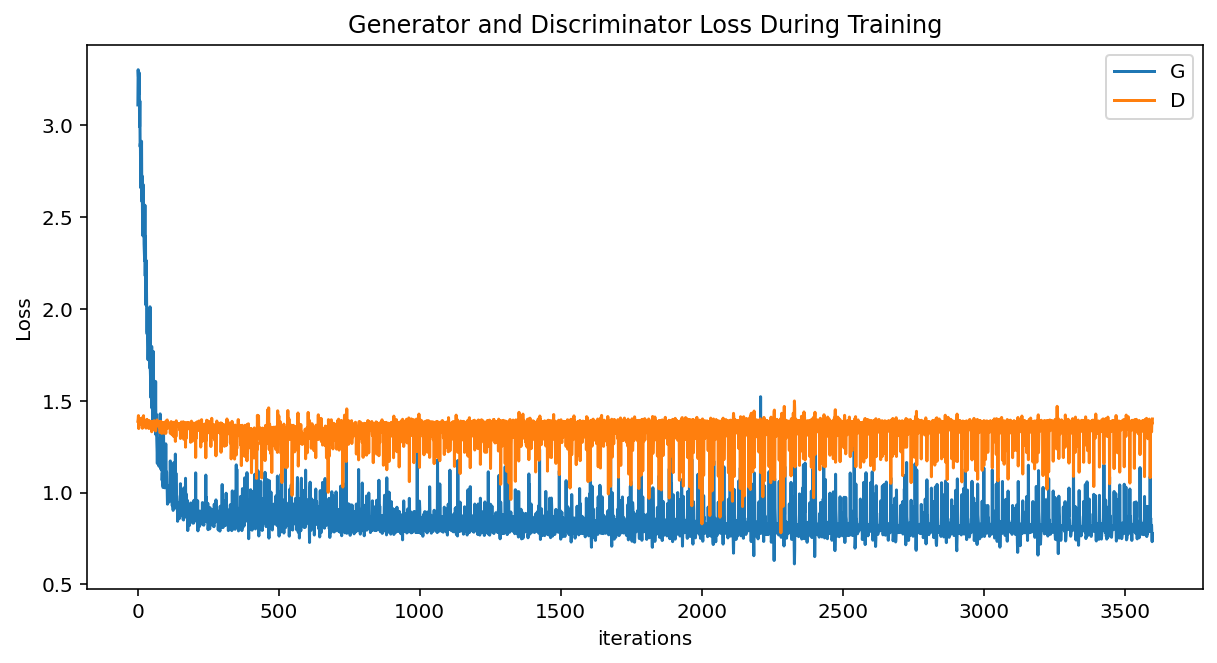

In [250]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

<h1>Save trained models to disk</h1>

In [36]:
torch.save(netD.state_dict(), "./checkpoint/discriminator_classical.pth")
torch.save(netG.state_dict(), "./checkpoint/generator_classical.pth")

<h1>Generate sample</h1>

In [251]:
iterator = iter(data_loader)
next(iterator)
next(iterator)
real_batch = next(iterator)
print(real_batch[0].shape)
outputs = []
for i in range(0,10):
    noise = torch.randn(BATCH_SIZE,nz).to(device)
    if i == 0:
        prev = real_batch[1]
        outputs.append(netG(noise,prev[0:8]))
    else:
        outputs.append(netG(noise,outputs[i - 1]))

torch.Size([48, 1, 16, 128])


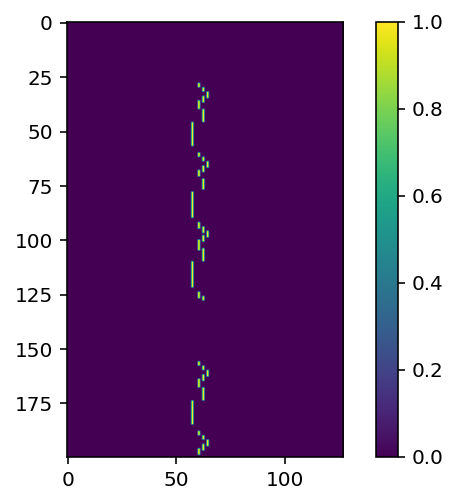

In [252]:
outputs = np.array(outputs)
melody = [outputs[i].detach().cpu().numpy() for i in range(0,10)]
melody = np.stack(melody)
melody = np.concatenate(melody, axis=0)
melodies = []
m = melody[0]
for i in range(1,melody.shape[0]):
    m = np.concatenate((m,melody[i]),axis=1)
m = m[0,:,0:127]
m[m > 0.6] = 1
m = m == 1
plt.imshow(m[0:200])
plt.colorbar()
plt.show()
melody_track = pypianoroll.BinaryTrack(pianoroll = m)
multi_track = pypianoroll.Multitrack(resolution=24, tracks=[melody_track])
pypianoroll.write('./sample.mid', multi_track)